Heat Map of the direction of passes for FC United vs Sporting Football

In [25]:
# Importing the necessary packages
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from mplsoccer import Pitch, FontManager, Sbopen
import numpy as np 
import matplotlib.patheffects as path_effects

rcParams['text.color'] = '#c7d5cc'  # set the default text color

The Data was provided by manully inputing data into the Soccer Event Logger. You can find the logger at https://torvaney.github.io/projects/tracker

In [2]:
coord = pd.read_csv("Copy of First_half.csv")

In [4]:
# The mathmateical operation is a result that the tracker uses 0-100 on the X and Y axis. 
# A football pitch is roughly 120 yards on the X axis and 80 yards on the Y axis.

end_pass_x = []
end_pass_y = []
start_pass_x = []
start_pass_y = []
for i in coord.index:
    if coord['mod1'][i] == True:
        a = np.array(coord['x'][i]) 
        ax = (a*120)/100
        end_pass_x.append(ax)
        b = np.array(coord['y'][i])
        by = (b*80)/100
        end_pass_y.append(by)
    elif coord['mod1'][i] == False:
        c = np.array(coord['x'][i])
        cx = (c*120)/100
        start_pass_x.append(cx)
        d = np.array(coord['y'][i])
        dy = (d*80)/100
        start_pass_y.append(dy)

In [5]:
data = {
    "start_x": start_pass_x,
    "start_y": start_pass_y,
    "end_x": end_pass_x,
    "end_y": end_pass_y
}

In [6]:
# Creating a new data frame with the transformations 
location=pd.DataFrame(data)

In [13]:
# Setup the pitch and number of bins
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (4, 3)

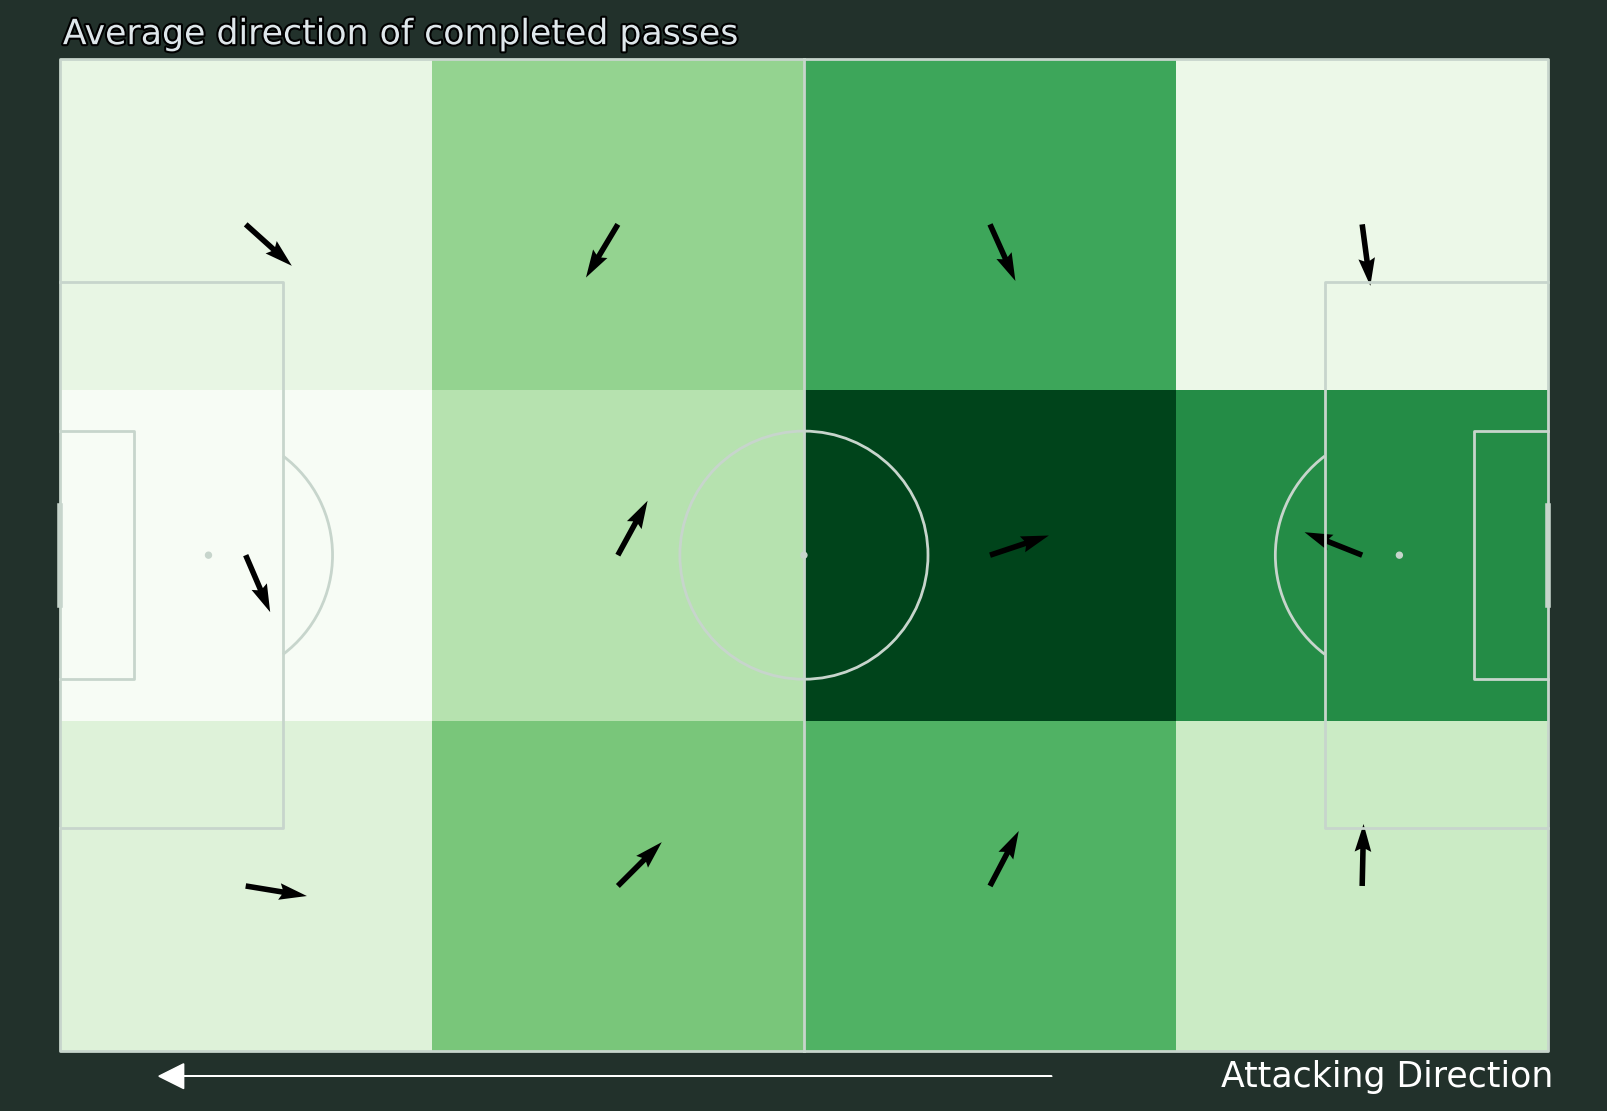

In [36]:
# Setting up the heat map, arrows, and text
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(location.start_x, location.start_y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(location.start_x, location.start_y, location.end_x, location.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=ax)
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

ax.text(27.5, -2, "Average direction of completed passes", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontsize=25)

ax.text(107, 82, 'Attacking Direction', va='center', ha='center', color='#FFFFFF', fontsize=25)
ax.arrow(80, 82, -70, 0, head_width=2, head_length=2, ec='w', fc='w')

This heat map shows us the average direction of completed passes. Unfortunately for FC United, the majority of their passes were not progressive. Based on this heat map alone we can see that only one arrow was towards the opposition (excluding the arrow in the GK box). We can also see that the heaviest amount of passes is going towards FC United's GK box instead of into the opponents half. You can come to the conclusion that the opposition was able to prevent any forward passing or movement from FC United. Given the right context, the coach should be able to adjust the side and create more attacking oriented passes, especially into the opponent's final third. 